# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

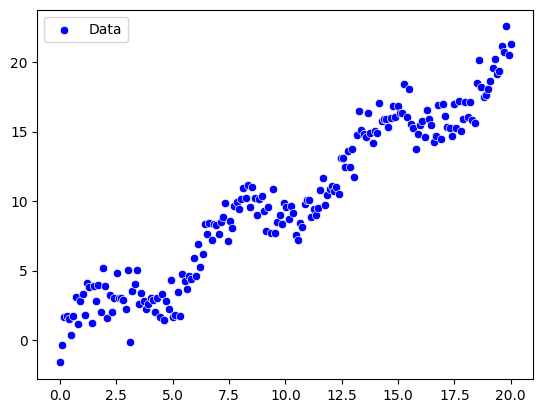

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([-1.6056]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.1145]])]

In [8]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=None):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0


        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            
        print(running_loss)
            



C:\Users\PC\AppData\Local\Temp\ipykernel_15208\3291700882.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [9]:
loss_fn = nn.MSELoss()

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Original

In [11]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features)


In [12]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [13]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=10,
                optimizer=optimizer
                )


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

991.4616091910284


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

601.2789711220412


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

566.3763290711213


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

598.1973294444651


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

598.1243788249558


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

611.7517575889651


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

589.1762013723494


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

612.2653541350664


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

606.4889876964735


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

609.851001213472


In [14]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

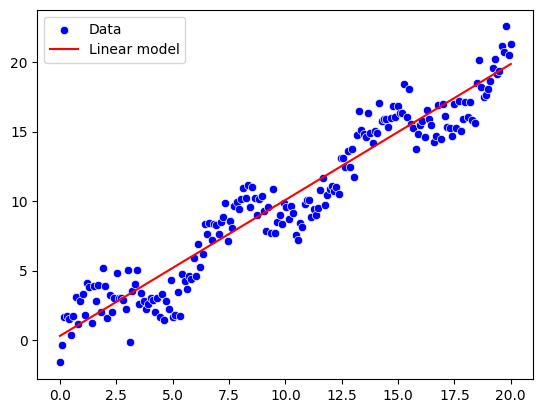

In [15]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')


# Optimized

In [21]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(1, 128),
    nn.Tanh(),                # better for smooth oscillations
    nn.Linear(128, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 1)
)

In [22]:
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

In [23]:
train_simple_network(model,
                loss_fn,
                training_loader,
                device=device,
                epochs=200,
                optimizer=optimizer
                )


Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3618.24103157036


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1483.2986208703378


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1259.1455020456642


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1185.4542405508437


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1071.6277714618482


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1012.1237121964405


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1040.964722256097


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1000.3255277157004


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1105.39778486851


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

950.9391142542154


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

946.2730163974047


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

885.2367140862953


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

974.6499830736948


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

817.0093438625881


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

962.823109959485


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

848.4484551411588


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

854.2537348063779


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

934.0744408613718


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

879.2580523297438


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

837.227240228709


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

838.6745085241346


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

773.8056897102947


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

646.2718745877501


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

766.5126893555571


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

741.7634659318719


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

673.2750981181744


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

682.8032064997824


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

684.2345306767247


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

768.2524380416735


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

678.8986387464247


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

764.9007614603688


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

712.4765323578613


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

641.4779894247913


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

665.4450461125234


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

634.9798033931293


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

609.9911576064326


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

708.819618556503


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

646.899930668842


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

639.0895665679136


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

573.6447473506578


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

645.2871910036629


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

649.4466972793452


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

538.5375058051432


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

619.3921912398655


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

608.4622863522964


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

523.2445576504688


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

604.4350906253676


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

596.7087685044971


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

645.5027236940223


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

574.0016799143486


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

621.6693522079149


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

568.4409538931577


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

562.2119508294854


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

575.2466209766653


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

527.7914961653296


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

527.6123493883206


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

612.9690929628887


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

580.063267323043


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

526.732796635366


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

653.5565515669259


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

711.2527546451929


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

545.9435004517436


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

593.3758581863731


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

682.6407602335858


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

497.81059694281976


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

472.22945544119284


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

678.0133148901596


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

551.4650779294316


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

591.0893042155367


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

826.8314257869224


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

546.9875323297601


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

572.4442031957442


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

526.5318055466059


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

499.36426755301363


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

597.8023743155682


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

524.351327505894


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

563.3999431701413


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

555.0156140451802


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

522.7715114243208


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

639.0706681173178


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

576.2474183313388


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

551.919482149242


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

521.0770469604286


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

474.19100854151475


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

497.12100245645706


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

561.1680910000005


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

596.3500298645959


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

541.8834401042222


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

522.5524713259802


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

573.530577083191


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

599.9471871137503


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

570.9127983272083


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

473.7090913647089


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

516.8529426177411


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

546.2455293639296


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

511.80326772621225


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

435.3479303448403


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

579.9335796453524


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

537.0419783989782


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

524.9856533111597


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

483.0591614435907


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

554.3286043583075


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

490.9764830125782


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

622.9948923287593


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

521.0754894676843


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

698.2793415896922


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

541.6934688397887


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

491.0662711166224


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

603.7388604145381


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

526.0856092446156


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

515.1812597283661


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

575.4404731888658


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

528.8689916057156


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

553.0112005169194


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

517.9254870432414


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

610.9698888993007


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

548.3004415636242


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

604.0778621649879


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

535.8506327684518


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

458.4066104980593


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

462.0841242370443


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

520.3289981521375


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

474.3076146528474


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

573.4783393928519


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

505.08673732649186


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

553.4226489279822


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

456.7070288720827


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

466.0169328399352


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

470.0288412263217


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

616.0441938252516


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

555.7511943711434


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

549.2269332720607


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

541.2124871839987


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

574.8504380154518


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

532.146655177381


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

523.5618246243685


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

443.5938068359428


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

509.72821358845977


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

480.3331964910649


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

533.4240218244377


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

426.0449599790245


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

413.8737976944381


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

497.2894770599669


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

534.754599417005


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

502.44781904308184


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

474.668231680349


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

543.4234673097462


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

550.3002375735377


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

473.47275757067837


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

445.85790836020897


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

453.76817883502054


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

433.67284497688524


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

421.5891301342426


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

584.8683138802617


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

625.7943546287397


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

403.7508595141262


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

473.3095081989777


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

518.3982900276969


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

537.5014329589867


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

495.63226118659077


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

525.6402837657588


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

478.3074146436411


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

505.8029673115985


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

474.2308509107179


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

479.29134560673265


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

491.9352599939484


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

448.43858505137996


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

655.0367106312915


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

463.4442592050036


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

560.0922232178345


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

480.9494319982923


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

418.2039483119561


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

526.8138914478527


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

432.66757633186717


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

550.7252900837229


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

519.160986465402


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

429.0765648779998


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

570.9794237038004


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

464.54202452756


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

448.49265185251716


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

595.2988913944528


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

510.0751690925608


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

453.3977102834333


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

483.8809538146452


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

567.441006215784


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

514.344176832059


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

506.727216892672


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

493.9364977298028


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

570.3469850863767


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

498.57624446440605


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

520.1201204623667


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

474.6217922439864


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

516.0580793369008


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

478.288908523504


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

448.6140386955012


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

552.8711140833329


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

493.2597441476182


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

468.99350469415367


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

484.577772189954


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

479.648573851475


In [24]:
# lets try our model
model.to('cpu')

model.eval()

with torch.inference_mode():
    y_pred_m = model(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

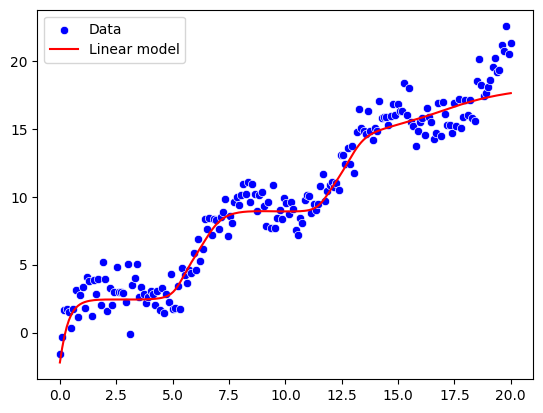

In [25]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m.ravel(),color='red',label='Linear model')